In [1]:
import matplotlib.pyplot as plt
#make pretty comments
from IPython.display import Latex 
#in case we want interactivity
from IPython.html.widgets import interactive 
#Make plots show up in notebook
%pylab inline --no-import-all 


Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
#Import various things for later
from scipy import linspace,sqrt, exp,log #linspace allows us to generate linear array between start and stop points
import scipy.optimize as optimization #curve fitting
from numpy import array
#testing goodness of fit
from scipy.stats import chi2 
from scipy.stats import chisqprob 
from scipy.special import erf

In [21]:
position=array([375,360,345,330,315,300,285,270,255,240,225,210,195,180,165,150,135,120,105,90,75])
power=array([0.454,0.454,0.454,0.44,0.374,0.284,0.252,0.227,0.206,0.194,0.178,0.155,0.132,0.096,0.075,0.059,0.04,0.013,0.0,-0.007,-0.011])
s=10*array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])

In [23]:
#define the fitting function.
def func(x,a,b,xo,w):
    return a+b/2*(1-erf(-sqrt(2)*(x-xo)/w))

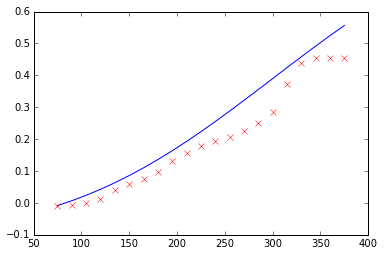

In [20]:
def fit_guess(a=1.,b=1,xo=100,w=100):
    plt.plot(position,func(position,a,b,xo,w))
    plt.plot(position,power,'rx')
    
w=interactive(fit_guess,a=(-10.,50.,.1), b=(0,20.,.01), x0=(0.01,400.,1),w=(0,500,1))
display(w)

a= -0.064175 +/- 0.065295 
b= 0.933148 +/- 0.547034 
x0= 336.898241 +/- 96.626094 
w= 326.511011 +/- 160.198016 


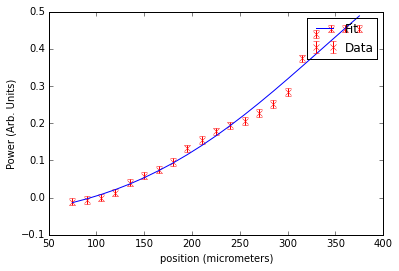

Reduced Chi Square=0.000000
Probability to obtain a higher Chi Square=1.000000


NameError: name 'py' is not defined

In [25]:
x0=array([0,0.2,250,173]) #Enter your intial guess here x0={a,b,c}
#calls the solver and puts the solution into the array solution, the uncertainties are put into the
#array covar. 
solution,covar= optimization.curve_fit(func,position,power,x0,s)
#Fit parameters and uncertainties
print "a= %f +/- %f " % (solution[0],sqrt(covar[0,0]))
print "b= %f +/- %f " % (solution[1],sqrt(covar[1,1]))
print "x0= %f +/- %f " % (solution[2],sqrt(covar[2,2]))
print "w= %f +/- %f " % (solution[3],sqrt(covar[3,3]))
plt.xlabel('position (micrometers)')
plt.ylabel('Power (Arb. Units)')
plt.errorbar(position, power, fmt = 'rx', yerr =s,label='Data') 
plt.plot(position,func(position,solution[0],solution[1],solution[2],solution[3]),label='Fit')
plt.legend(loc='upper right')
plt.show()
#Calculate Goodness of fit.
chisqr=numpy.sum((power-func(position,solution[0],solution[1],solution[2],solution[3]))/s)**2
dof=len(power)-len(x0)
GOF = 1. - chi2.cdf(chisqr,dof)
print "Reduced Chi Square=%f"%(chisqr/dof)
print "Probability to obtain a higher Chi Square=%f"%(GOF)
fig = plt.gcf()
py.iplot_mpl(fig)

